In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("train.csv")
df.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [54]:
df.describe()

v.id    on road old  on road now        years             km  \
count  1000.000000    1000.000000    1000.0000  1000.000000    1000.000000   
mean    500.500000  601648.286000  799131.3970     4.561000  100274.430000   
std     288.819436   58407.246204   57028.9502     1.719079   29150.463233   
min       1.000000  500265.000000  700018.0000     2.000000   50324.000000   
25%     250.750000  548860.500000  750997.7500     3.000000   74367.500000   
50%     500.500000  601568.000000  798168.0000     5.000000  100139.500000   
75%     750.250000  652267.250000  847563.2500     6.000000  125048.000000   
max    1000.000000  699859.000000  899797.0000     7.000000  149902.000000   

            rating    condition      economy   top speed          hp  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.00000   
mean      2.988000     5.592000    11.625000   166.89300    84.54600   
std       1.402791     2.824449     2.230549    19.28838    20.51694   
min       1.000000     1.000000     8.000000   135.00000    50.00000   
25%       2.000000     3.000000    10.000000   150.00000    67.00000   
50%       3.000000     6.000000    12.000000   166.00000    84.00000   
75%       4.000000     8.000000    13.000000   184.00000   102.00000   
max       5.000000    10.000000    15.000000   200.00000   120.00000   

            torque  current price  
count  1000.000000     1000.00000  
mean    103.423000   308520.24250  
std      21.058716   126073.25915  
min      68.000000    28226.50000  
25%      85.000000   206871.75000  
50%     104.000000   306717.75000  
75%     121.000000   414260.87500  
max     140.000000   584267.50000

In [88]:
df_corr = df.corr()
df_corr

v.id  on road old  on road now     years        km  \
v.id           1.000000    -0.029926    -0.030787 -0.034255  0.047400   
on road old   -0.029926     1.000000     0.034113  0.007207  0.007488   
on road now   -0.030787     0.034113     1.000000  0.004609 -0.053202   
years         -0.034255     0.007207     0.004609  1.000000 -0.002089   
km             0.047400     0.007488    -0.053202 -0.002089  1.000000   
rating        -0.018263    -0.050717     0.028280  0.027285 -0.039930   
condition     -0.038548    -0.015682    -0.005043  0.053579 -0.013640   
economy        0.047137    -0.030097    -0.015880  0.050220  0.032680   
top speed      0.001613    -0.023816     0.012699  0.025148  0.026450   
hp            -0.006997    -0.049266    -0.012719 -0.003272 -0.052918   
torque        -0.000632     0.008950     0.017955  0.028859  0.013566   
current price -0.059460     0.233035     0.282793 -0.011854 -0.935924   

                 rating  condition   economy  top speed        hp    torque  \
v.id          -0.018263  -0.038548  0.047137   0.001613 -0.006997 -0.000632   
on road old   -0.050717  -0.015682 -0.030097  -0.023816 -0.049266  0.008950   
on road now    0.028280  -0.005043 -0.015880   0.012699 -0.012719  0.017955   
years          0.027285   0.053579  0.050220   0.025148 -0.003272  0.028859   
km            -0.039930  -0.013640  0.032680   0.026450 -0.052918  0.013566   
rating         1.000000   0.015943 -0.009757  -0.042222 -0.022623  0.004408   
condition      0.015943   1.000000  0.058788   0.018472 -0.071552  0.047805   
economy       -0.009757   0.058788  1.000000  -0.059402 -0.016782  0.041632   
top speed     -0.042222   0.018472 -0.059402   1.000000  0.057827 -0.019697   
hp            -0.022623  -0.071552 -0.016782   0.057827  1.000000 -0.013817   
torque         0.004408   0.047805  0.041632  -0.019697 -0.013817  1.000000   
current price  0.035038   0.110108 -0.034711  -0.027993  0.030238 -0.002290   

               current price  
v.id               -0.059460  
on road old         0.233035  
on road now         0.282793  
years              -0.011854  
km                 -0.935924  
rating              0.035038  
condition           0.110108  
economy            -0.034711  
top speed          -0.027993  
hp                  0.030238  
torque             -0.002290  
current price       1.000000

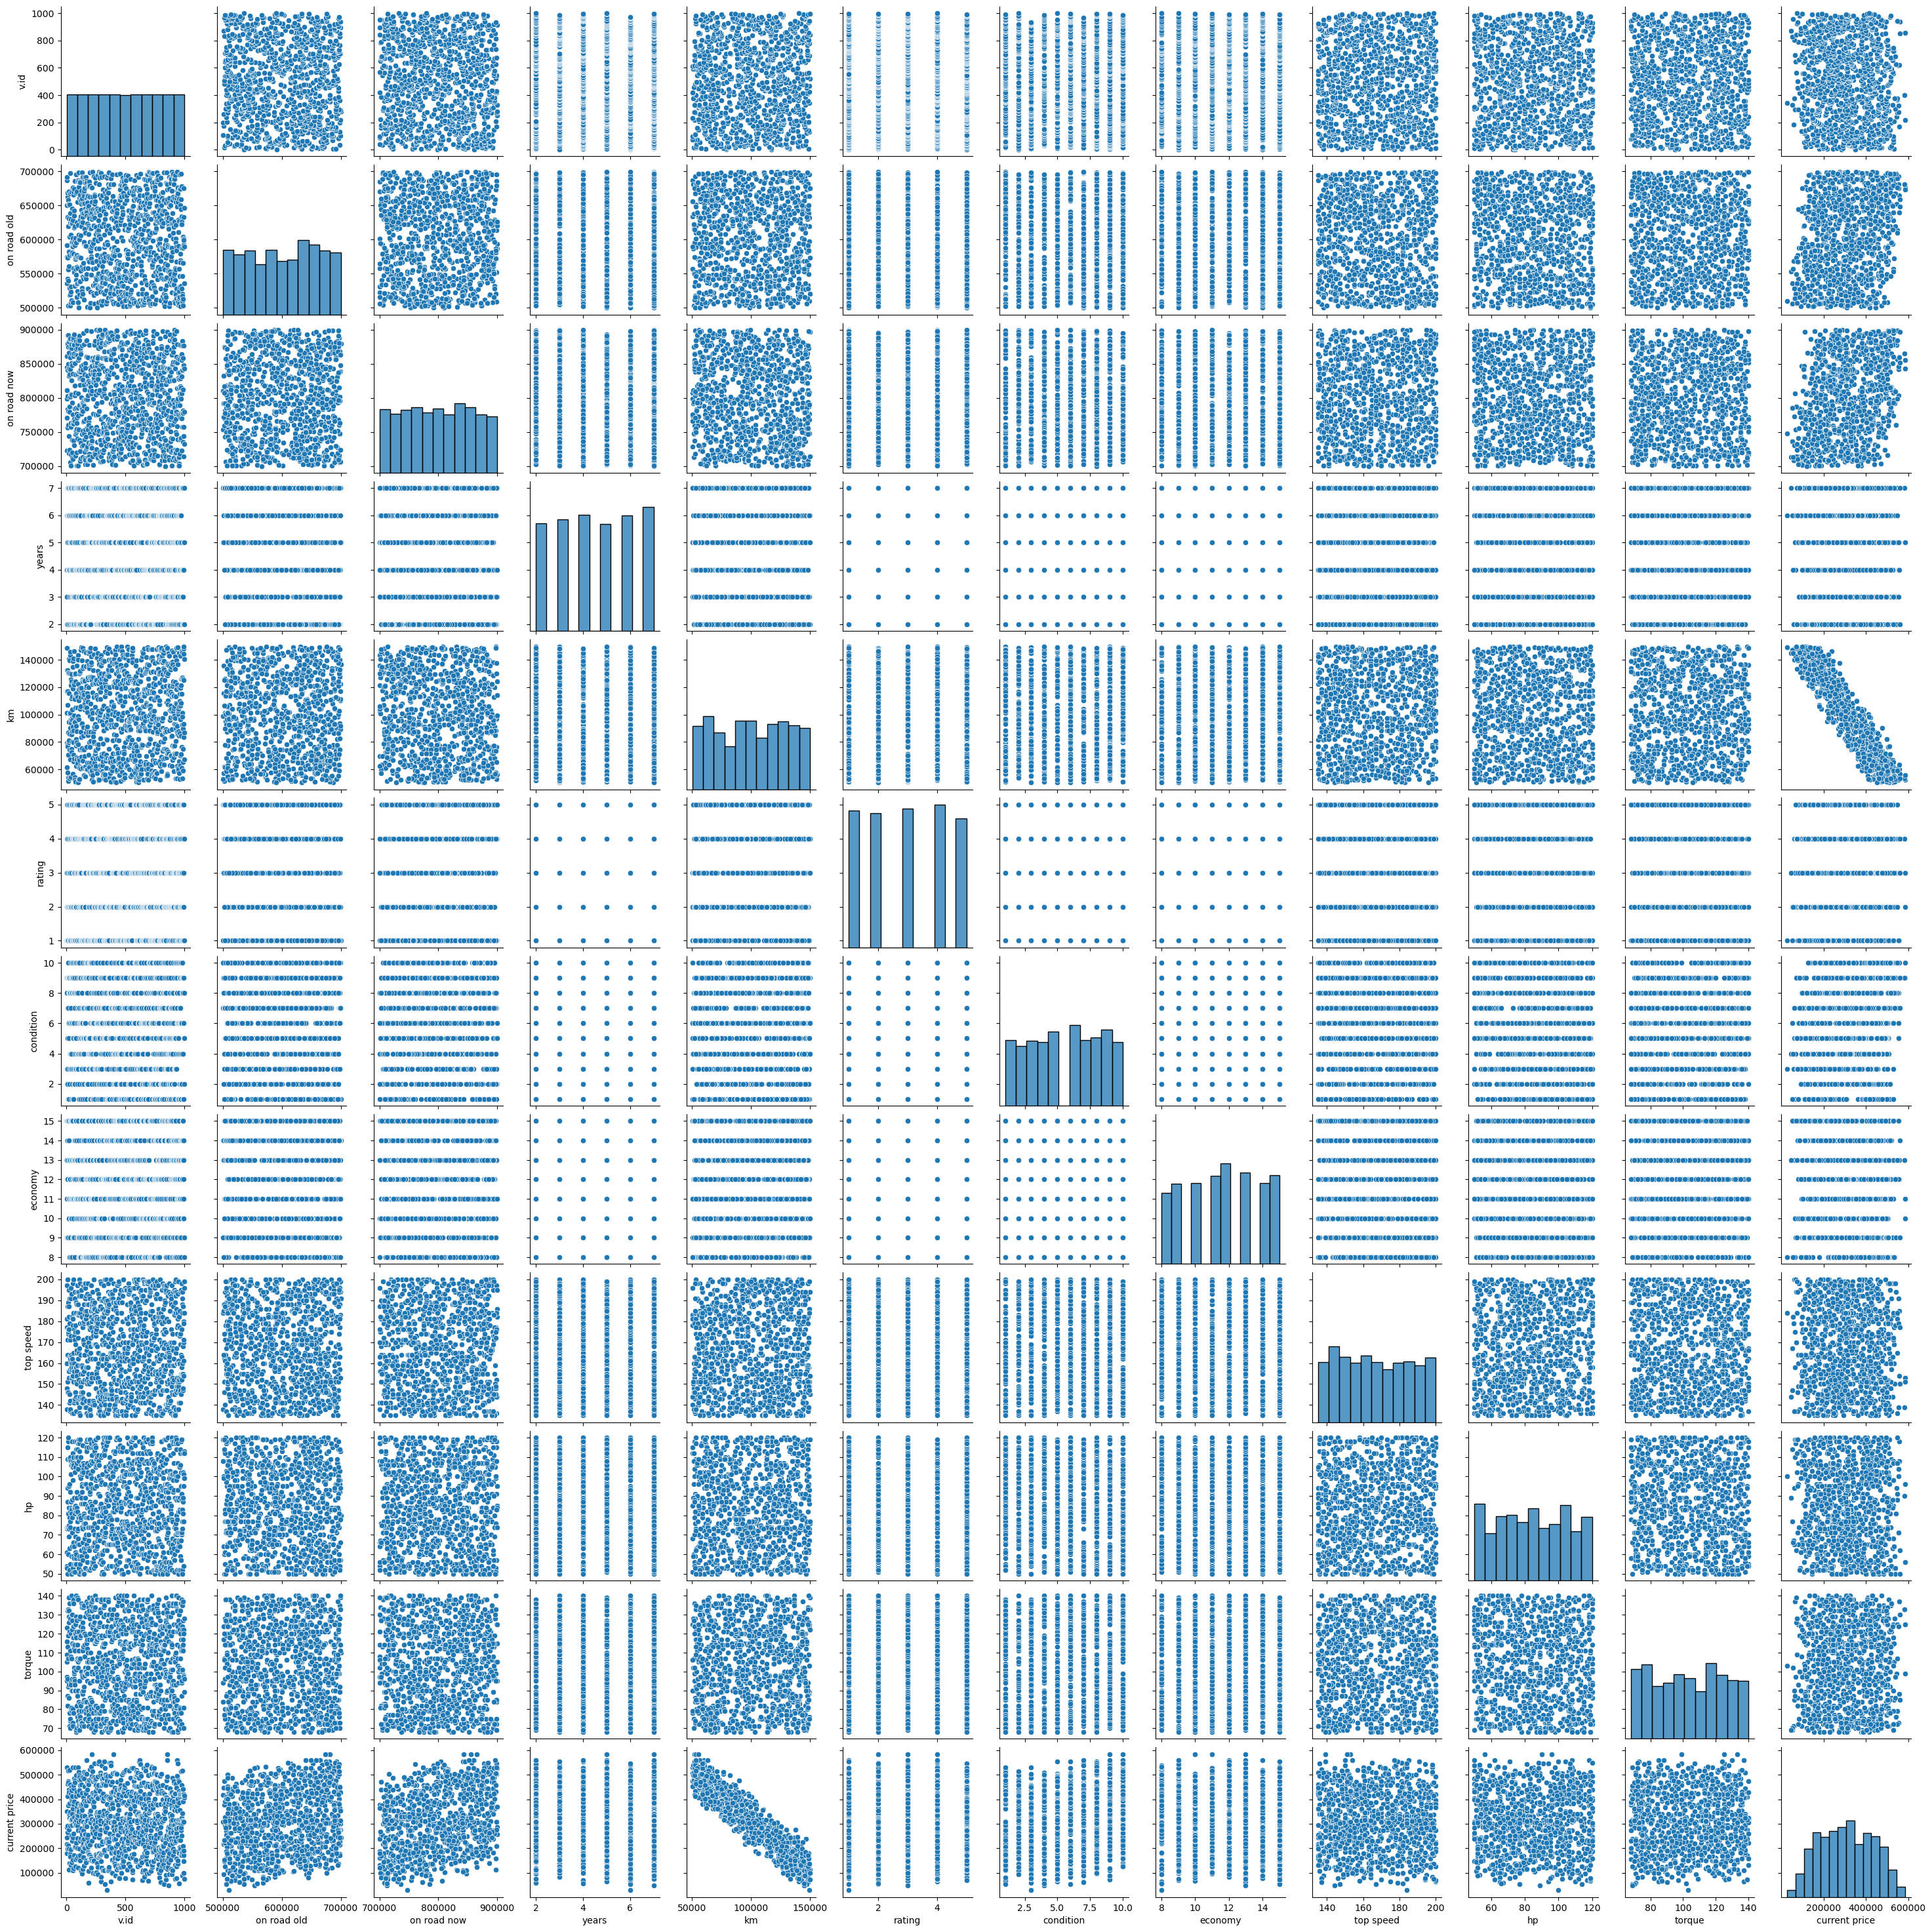

In [90]:
sns.pairplot(df)
plt.show()

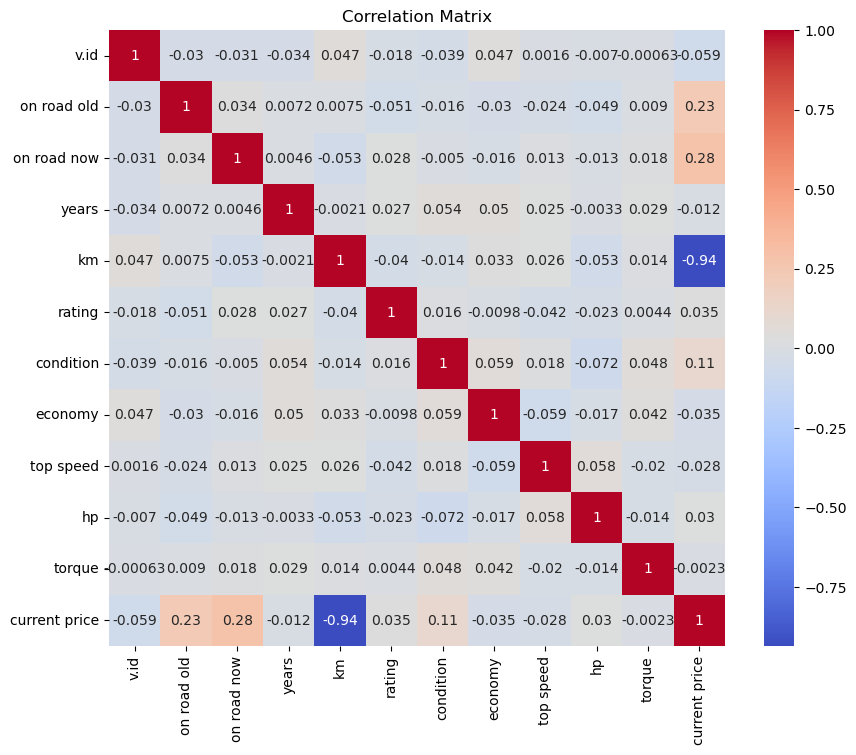

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='current price', axis='columns')
y = df['current price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [84]:
model.score(X_test, y_test)

0.9948264363667761

In [86]:
model.predict(X_test)

array([232877.74572258, 139221.15661182, 469581.18060586, 200201.96367458,
       502316.37092423, 436170.63549833, 208275.95364621, 349572.77967211,
       286194.71829864, 166180.75598329, 406168.44524255, 336345.45279496,
       360168.1271386 , 432263.25465712, 262856.19269901, 325791.46743199,
       231195.28514792, 211354.70112021, 341608.47053839, 224649.73706972,
       387870.50428125, 390251.51235695, 399139.41541265, 191833.91566346,
       123414.48222281, 256878.40400154, 432099.08217868, 416801.61195289,
       145934.22649585, 331945.71491288, 220093.02281411, 217735.31075114,
       386388.57103243, 415991.086265  , 324581.93929566, 179485.83752349,
       160309.69307172, 256479.27694315, 375296.79180621, 300649.13351459,
       308285.33077744, 534642.84380781, 327867.89385827, 427765.63768315,
       365661.60710083, 361268.59793514, 327870.61441378, 385824.45349322,
       255516.75373497, 323060.02257568, 278262.68466189, 371268.39202171,
       161772.50009564, 2